In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension for CNN
x_train_cnn = np.expand_dims(x_train, -1)
x_test_cnn = np.expand_dims(x_test, -1)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def create_teacher():
    model = keras.Sequential([
        layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(28,28,1)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10)
    ])
    return model

teacher = create_teacher()
teacher.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

teacher_history = teacher.fit(
    x_train_cnn, y_train,
    validation_split=0.1,
    epochs=8,
    batch_size=64,
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 60s 69ms/step - accuracy: 0.7668 - loss: 0.6493 - val_accuracy: 0.8755 - val_loss: 0.3428
Epoch 2/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - accuracy: 0.8846 - loss: 0.3142 - val_accuracy: 0.9010 - val_loss: 0.2736
Epoch 3/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 60s 72ms/step - accuracy: 0.9062 - loss: 0.2656 - val_accuracy: 0.9077 - val_loss: 0.2568
Epoch 4/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 70ms/step - accuracy: 0.9175 - loss: 0.2260 - val_accuracy: 0.9130 - val_loss: 0.2442
Epoch 5/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 58s 69ms/step - accuracy: 0.9255 - loss: 0.2021 - val_accuracy: 0.9163 - val_loss: 0.2303
Epoch 6/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.9349 - loss: 0.1821 - val_accuracy: 0.9080 - val_loss: 0.2492
Epoch 7/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 67ms/step - accuracy: 0.9454 - loss: 0.1537 - val_accuracy: 0.9167 - val_loss: 0.2291
Epoch 8/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.9482 - loss: 0.1426 - val_accu

In [4]:
def create_student():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(10)
    ])
    return model

student_scratch = create_student()
student_scratch.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

student_scratch_history = student_scratch.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=8,
    batch_size=64,
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7392 - loss: 0.7514 - val_accuracy: 0.8487 - val_loss: 0.4078
Epoch 2/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8599 - loss: 0.3971 - val_accuracy: 0.8610 - val_loss: 0.3938
Epoch 3/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8728 - loss: 0.3590 - val_accuracy: 0.8657 - val_loss: 0.3724
Epoch 4/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8788 - loss: 0.3358 - val_accuracy: 0.8765 - val_loss: 0.3436
Epoch 5/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8859 - loss: 0.3132 - val_accuracy: 0.8808 - val_loss: 0.3326
Epoch 6/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8877 - loss: 0.3076 - val_accuracy: 0.8825 - val_loss: 0.3248
Epoch 7/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8938 - loss: 0.2882 - val_accuracy: 0.8770 - val_loss: 0.3426
Epoch 8/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8947 - loss: 0.2874 - val_accuracy: 0.8780 - v

In [5]:
class Distiller(keras.Model):
    def __init__(self, student, teacher, temperature=5, alpha=0.5):
        super().__init__()
        self.student = student
        self.teacher = teacher
        self.temperature = temperature
        self.alpha = alpha
        self.loss_ce = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
        self.loss_kd = keras.losses.KLDivergence()

    def compile(self, optimizer):
        super().compile()
        self.optimizer = optimizer
        self.train_acc = keras.metrics.SparseCategoricalAccuracy()
        self.val_acc = keras.metrics.SparseCategoricalAccuracy()

    def train_step(self, data):
        x, y = data
        teacher_logits = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            student_logits = self.student(x, training=True)

            # Softened probabilities
            t = self.temperature
            teacher_soft = tf.nn.softmax(teacher_logits / t)
            student_soft = tf.nn.softmax(student_logits / t)

            hard_loss = self.loss_ce(y, student_logits)
            soft_loss = self.loss_kd(teacher_soft, student_soft) * (t*t)

            loss = self.alpha * hard_loss + (1 - self.alpha) * soft_loss

        grads = tape.gradient(loss, self.student.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.student.trainable_variables))

        self.train_acc.update_state(y, student_logits)
        return {"loss": loss, "accuracy": self.train_acc.result()}

    def test_step(self, data):
        x, y = data
        logits = self.student(x, training=False)
        self.val_acc.update_state(y, logits)
        return {"accuracy": self.val_acc.result()}


In [6]:
distilled_student = create_student()

distiller = Distiller(
    student=distilled_student,
    teacher=teacher,
    temperature=8,
    alpha=0.3
)

distiller.compile(optimizer=keras.optimizers.Adam())
distiller_history = distiller.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=8,
    batch_size=64,
)


Epoch 1/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 50ms/step - accuracy: 0.7061 - loss: 3.7487 - val_accuracy: 0.8337
Epoch 2/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.8378 - loss: 1.7393 - val_accuracy: 0.8510
Epoch 3/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.8566 - loss: 1.4142 - val_accuracy: 0.8568
Epoch 4/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.8637 - loss: 1.2523 - val_accuracy: 0.8700
Epoch 5/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.8719 - loss: 1.1369 - val_accuracy: 0.8730
Epoch 6/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.8774 - loss: 1.0592 - val_accuracy: 0.8673
Epoch 7/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.8822 - loss: 1.0070 - val_accuracy: 0.8727
Epoch 8/8
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.8826 - loss: 0.9701 - val_accuracy: 0.8748


In [8]:
distilled_student.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)


In [9]:
teacher_acc = teacher.evaluate(x_test_cnn, y_test)[1]
scratch_acc = student_scratch.evaluate(x_test, y_test)[1]
distilled_acc = distilled_student.evaluate(x_test, y_test)[1]

print("Teacher accuracy:", teacher_acc)
print("Student (scratch) accuracy:", scratch_acc)
print("Student (distilled) accuracy:", distilled_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9171 - loss: 0.2541
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8677 - loss: 0.3690
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8680 - loss: 0.4203
Teacher accuracy: 0.9186999797821045
Student (scratch) accuracy: 0.8654000163078308
Student (distilled) accuracy: 0.8652999997138977


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


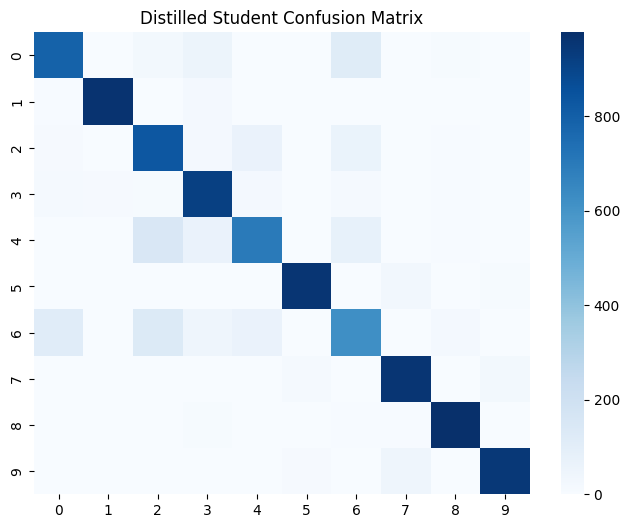

In [10]:
from sklearn.metrics import confusion_matrix

preds = np.argmax(distilled_student.predict(x_test), axis=1)
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Distilled Student Confusion Matrix")
plt.show()


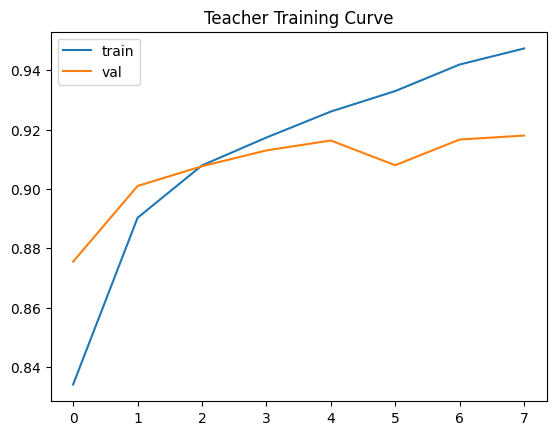

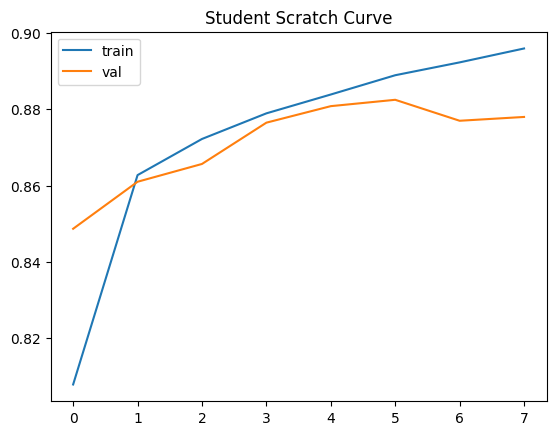

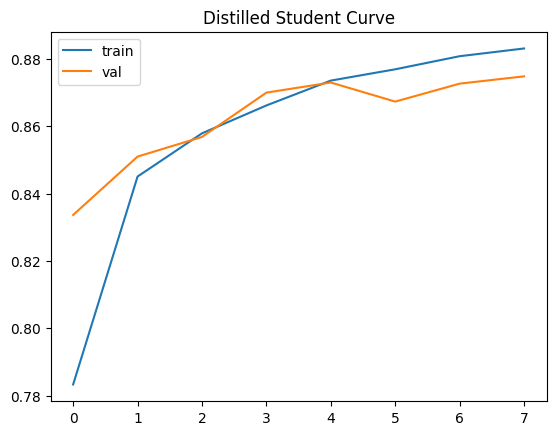

In [13]:
def plot_curve(history, title):
    plt.plot(history.history["accuracy"], label="train")
    if "val_accuracy" in history.history:
        plt.plot(history.history["val_accuracy"], label="val")
    plt.title(title)
    plt.legend()
    plt.show()

plot_curve(teacher_history, "Teacher Training Curve")
plot_curve(student_scratch_history, "Student Scratch Curve")
plot_curve(distiller_history, "Distilled Student Curve")
